In [3]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [4]:
bean = datasets.load_boston()
print bean.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
def load_boston():
    scaler = StandardScaler()
    boston = datasets.load_boston()
    X=boston.data
    y=boston.target
    X = scaler.fit_transform(X)
    return train_test_split(X,y)

In [6]:
X_train, X_test, y_train, y_test = load_boston()

In [7]:
X_train.shape

(379L, 13L)

In [8]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
zip (y_test, clf.predict(X_test))

[(35.399999999999999, 34.396839594004561),
 (10.9, 18.706411346977905),
 (19.100000000000001, 16.789777867767846),
 (23.5, 30.970076109769821),
 (10.199999999999999, 16.639949582040277),
 (36.5, 35.574620973322588),
 (9.6999999999999993, 10.64709102232878),
 (24.100000000000001, 29.833519903225966),
 (15.1, 17.053044636504779),
 (24.600000000000001, 24.941343863636224),
 (22.0, 21.420790767455294),
 (37.200000000000003, 32.789092092714569),
 (22.199999999999999, 19.850355368553792),
 (14.5, 17.999525330587808),
 (22.800000000000001, 28.838865810631241),
 (18.399999999999999, 19.358009081529481),
 (17.199999999999999, 14.995941091195071),
 (28.699999999999999, 25.146918692870386),
 (21.600000000000001, 24.682352423733512),
 (16.699999999999999, 20.166845049239644),
 (19.800000000000001, 18.694432208724987),
 (10.4, 16.989051985721773),
 (39.799999999999997, 34.305531971326204),
 (30.100000000000001, 29.279188242228933),
 (22.199999999999999, 23.937439244493184),
 (21.0, 21.5339571122597

In [10]:
y_pred = clf.predict(X_test)

In [12]:
# r2 on the given linear regressor (closer to 1 the better):
r2_score(y_test, y_pred)

0.66515048549356814

In [13]:
#MSE on the given linear regressor (the smaller the better):
mean_squared_error(y_test, y_pred)

26.944655951677021

In [11]:
# Selecting the Ridge method
from sklearn.linear_model import Ridge

In [12]:
# Let's start somewhere, then modify the alpha parameter to find an optimum r2
clf_mtd = Ridge(alpha=1.0) #instantiate the model
clf_mtd.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
# Test run r2 to see where we are at ... goal to optimize to closest to R2 = 1.0
r2_score(y_test, clf_mtd.predict(X_test))

0.74368455848153303

In [19]:
# Let's explore different alpha parameters and see what R2 is -- just to give a feel for what this landscape looks like
# NOTE: I explore until much further below.

clf_mtd = Ridge(alpha=1.5)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66474259230855037

In [21]:
clf_mtd = Ridge(alpha=0.5)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66501883060021705

In [23]:
clf_mtd = Ridge(alpha=0.1)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66512455128317194

In [25]:
clf_mtd = Ridge(alpha=0.001)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66515022718383809

In [27]:
clf_mtd = Ridge(alpha=-1.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66539711910760757

In [29]:
clf_mtd = Ridge(alpha=-100.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
r2_score(y_test, clf_mtd.predict(X_test))

-1.237517707578736

In [31]:
clf_mtd = Ridge(alpha=-10.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66419387155217224

In [33]:
clf_mtd = Ridge(alpha=-5.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-5.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
r2_score(y_test, clf_mtd.predict(X_test))

0.6659880451113922

In [35]:
clf_mtd = Ridge(alpha=-50.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-50.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
r2_score(y_test, clf_mtd.predict(X_test))

0.15593232772921017

In [37]:
clf_mtd = Ridge(alpha=-30.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-30.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
r2_score(y_test, clf_mtd.predict(X_test))

0.4036129061672703

In [39]:
clf_mtd = Ridge(alpha=-90.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-90.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
r2_score(y_test, clf_mtd.predict(X_test))

-44.805178498127837

In [41]:
clf_mtd = Ridge(alpha=-60.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-60.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
r2_score(y_test, clf_mtd.predict(X_test))

-24.814170284744435

In [43]:
clf_mtd = Ridge(alpha=-40.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-40.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
r2_score(y_test, clf_mtd.predict(X_test))

0.57112376121562514

In [45]:
clf_mtd = Ridge(alpha=-55.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-55.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
r2_score(y_test, clf_mtd.predict(X_test))

-4.0072023724542563

In [47]:
clf_mtd = Ridge(alpha=-56.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-56.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
r2_score(y_test, clf_mtd.predict(X_test))

-9.7886967065597368

In [49]:
clf_mtd = Ridge(alpha=-53.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-53.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
r2_score(y_test, clf_mtd.predict(X_test))

-0.88207512858182957

In [51]:
clf_mtd = Ridge(alpha=-53.5)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-53.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
r2_score(y_test, clf_mtd.predict(X_test))

-1.2951969512130135

In [53]:
clf_mtd = Ridge(alpha=-53.25)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-53.25, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
r2_score(y_test, clf_mtd.predict(X_test))

-1.0720236344286045

In [55]:
clf_mtd = Ridge(alpha=-45.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-45.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
r2_score(y_test, clf_mtd.predict(X_test))

0.50742382374989092

In [57]:
clf_mtd = Ridge(alpha=-38.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-38.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
r2_score(y_test, clf_mtd.predict(X_test))

0.57289343010875537

In [59]:
clf_mtd = Ridge(alpha=-20.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-20.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
r2_score(y_test, clf_mtd.predict(X_test))

0.50386570032458855

In [61]:
clf_mtd = Ridge(alpha=-30.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-30.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
r2_score(y_test, clf_mtd.predict(X_test))

0.4036129061672703

In [63]:
clf_mtd = Ridge(alpha=-37.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-37.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
r2_score(y_test, clf_mtd.predict(X_test))

0.57009308440693118

In [65]:
clf_mtd = Ridge(alpha=-39.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-39.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
r2_score(y_test, clf_mtd.predict(X_test))

0.57324307709399558

In [67]:
clf_mtd = Ridge(alpha=-45.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-45.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
r2_score(y_test, clf_mtd.predict(X_test))

0.50742382374989092

In [69]:
clf_mtd = Ridge(alpha=-48.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-48.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
r2_score(y_test, clf_mtd.predict(X_test))

0.37137149222919996

In [71]:
clf_mtd = Ridge(alpha=-50.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-50.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
r2_score(y_test, clf_mtd.predict(X_test))

0.15593232772921017

In [73]:
clf_mtd = Ridge(alpha=10.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66214029894895221

In [75]:
clf_mtd = Ridge(alpha=100.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
r2_score(y_test, clf_mtd.predict(X_test))

0.6415166030429591

In [77]:
clf_mtd = Ridge(alpha=5.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66369489472183374

In [79]:
clf_mtd = Ridge(alpha=-6.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-6.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
r2_score(y_test, clf_mtd.predict(X_test))

0.6659623193918196

In [81]:
clf_mtd = Ridge(alpha=-8.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-8.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66551658815837755

In [83]:
clf_mtd = Ridge(alpha=-10.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66419387155217224

In [85]:
clf_mtd = Ridge(alpha=-7.0)
clf_mtd.fit(X_train, y_train)

Ridge(alpha=-7.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [86]:
r2_score(y_test, clf_mtd.predict(X_test))

0.66581853404617686

In [34]:
##################################################################################################
# OK I can see there some minimums in how R2 varies with alpha, and not getting really close to 1.
# So, taking a more continuous approach to visualize a broader swath of alpha values at once:

r2_results = [] # setup an array to hold all of the results of r2

In [35]:
# loop through a large range of alpha parameter values to see what r2 values result
for i in range(-100,100):
    clf_mtd = Ridge(alpha=i)
    clf_mtd.fit(X_train, y_train)
    r2_results.append(r2_score(y_test, clf_mtd.predict(X_test)))
    i = i + 0.1
    

In [36]:
print r2_results

[-28002.05635351743, -44.653954750829719, -11.346150403481008, -5.1731121114832979, -2.9653403292995986, -1.9195254738911829, -1.3403608439881722, -0.98695068051471035, -0.75731654648126212, -0.60199556660661457, -0.49438947187092075, -0.41874850460505786, -0.3646040853128556, -0.32906396119553483, -1.4222371324226297, -0.84166818830487311, -0.58689449323640597, -0.58235624595453128, -0.63407352786407678, -0.72451534125350681, -0.85610122350986151, -1.0400727175041262, -1.2975261926034629, -1.6659110156633443, -2.2145381229186007, -3.0826664967018624, -4.5859679247686707, -7.5792283476120605, -15.141222028523039, -46.57322762806092, -1101.611891640247, -116.42882739078108, -21.294406370491753, -9.7507655547033778, -7.8753246030189281, -11.998590302289243, -49.002562515443408, -772.15950459081512, -18.757439384340579, -4.9339823174189092, -1.90814066860858, -0.77713601901313956, -0.23299770802190811, 0.070330739720215307, 0.2563864782588452, 0.37833139588903164, 0.46218764645949173, 0.5

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
plt.plot(r2_results)

In [39]:
plt.show()

In [40]:
from IPython.core.display import Image

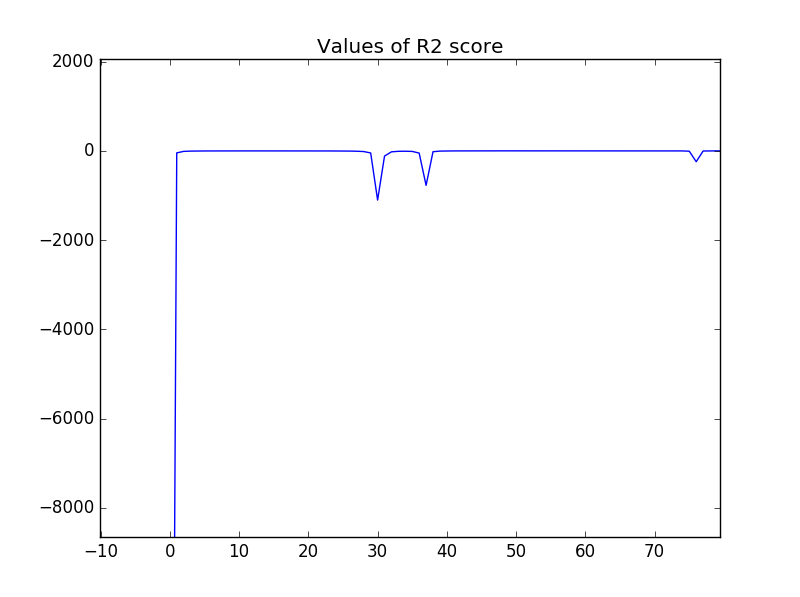

In [41]:
Image('figure_1.png')

In [42]:
# OK, so that is interesting -- the minimums are not where things get optimum!
# Let's do a better job plotting R2 vs alpha:
r2_results = []
r2_i = []
i = -10
while i < 1.1:
    clf_mtd = Ridge(alpha=i)
    clf_mtd.fit(X_train, y_train)
    r2_results.append(r2_score(y_test, clf_mtd.predict(X_test)))
    r2_i.append(i)
    i = i + 0.01

In [43]:
results = np.array([r2_results, r2_i])

In [44]:
r2_results_np = np.array(r2_results)

In [45]:
# Calculate the MAXIMUM value R2 ever gets for the range of alpha values where the max appears to occur:
r2_results_np.max()

0.74459720773736771

In [46]:
plt.plot(r2_i, r2_results)
plt.show()

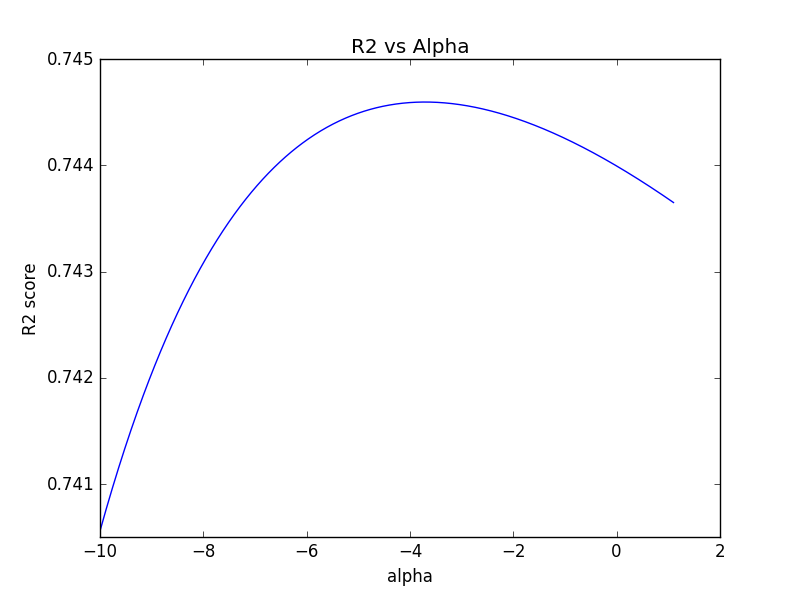

In [47]:
Image('figure_2.png')

In [48]:
# Now, let's try to identify exactly the value of alpha for where R2 score is MAXIMUM (i.e., closest to 1)
np.where(r2_results_np == np.max(r2_results_np))

(array([629], dtype=int64),)

In [49]:
results_list = results.tolist()

In [50]:
results[1][629] # THE (local) OPTIMUM VALUE FOR i = alpha

-3.7100000000001341

In [51]:
# Now, I'll run the same procedure to find the optimum value for alpha according to MSE

# MSE
clf_mtd_mse = Ridge(alpha=1) #start somewhere
clf_mtd_mse.fit(X_train, y_train)
mean_squared_error(y_test, clf_mtd_mse.predict(X_test))


25.181865574434017

In [52]:
mse_results = []
mse_i = []
i = -10
while i < 1.1:
    clf_mtd_mse = Ridge(alpha=i)
    clf_mtd_mse.fit(X_train, y_train)
    mse_results.append(mean_squared_error(y_test, clf_mtd_mse.predict(X_test)))
    mse_i.append(i)
    i = i + 0.01

In [53]:
plt.plot(mse_i, mse_results)
plt.show()

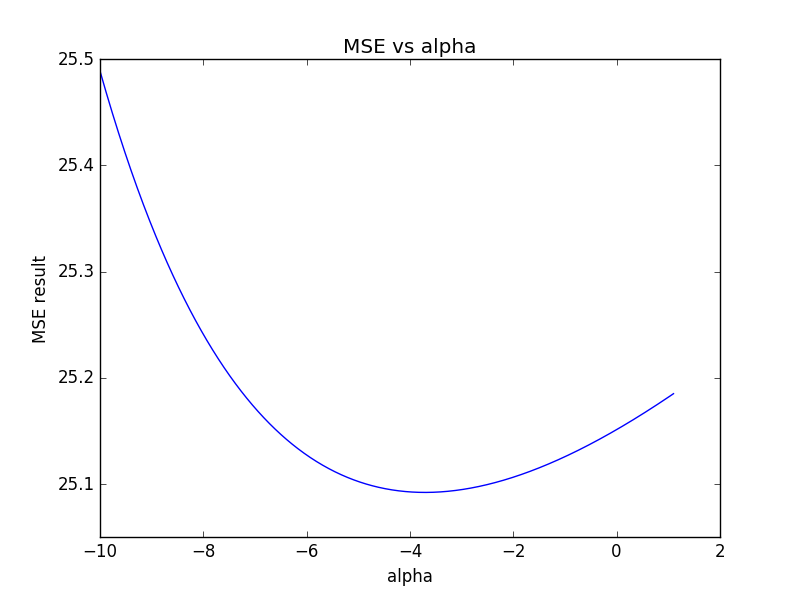

In [54]:
Image('figure_3.png')

In [55]:
# Similarly as before, find the exact alpha for the minimum MSE value:
mse_results_np = np.array(mse_results)
np.where(mse_results_np == np.min(mse_results_np))

(array([629], dtype=int64),)

In [56]:
mse_results_np[629]

25.092201796314033

In [57]:
mse_i[629] # THE (local) OPTIMUM VALUE FOR i = alpha
# Looks like the SAME alpha value as found from R2 score!

-3.710000000000134